In [85]:
import numpy as np
from matplotlib import pyplot as plt
from SERSGenerator import SERSGenerator, pseudo_voigt

from sklearn.decomposition import PCA
from matplotlib.ticker import MultipleLocator

In [124]:
gen = SERSGenerator(mapsize=(20,20), Nw=500, seed=100, eta=0)
X = gen.generate(N_hotspots=2, K=1, sig=0.1, sbr=1, plot=False, background='none')
mapsize = gen.mapsize
c = gen.c # Peak position

In [129]:
def plot_map(gen, X, figsize=(10,10)):
    fig, axs = plt.subplots(2,2, figsize=figsize)

    # SERS Matrix
    axs[0,0].matshow(X, cmap='viridis')
    axs[0,0].set_xlabel('Wavenumber')
    axs[0,0].set_ylabel('Spectrum index')
    axs[0,0].set_title('X')
    axs[0,0].grid(False)


    # Map at peak 1
    mappable = axs[0,1].matshow(X[:, int(round(gen.c[0]))].reshape(*gen.mapsize), cmap='viridis')
    axs[0,1].set_title(f'c={round(gen.c[0])}')
    axs[0,1].grid(False)
    plt.colorbar(mappable=mappable, ax=axs[0,1])

    # One spectrum
    axs[1,0].plot(X[np.argmax(X)//gen.Nw,:])
    axs[1,0].set_xlabel('Wavenumber')
    axs[1,0].set_title('Highest spectrum')

    # Pure Voigt of peak 1
    axs[1,1].plot(gen.Vp[0,:])
    axs[1,1].set_xlabel('Wavenumber')
    axs[1,1].set_title('Pure Voigt 1')

    fig.tight_layout()
    plt.show()

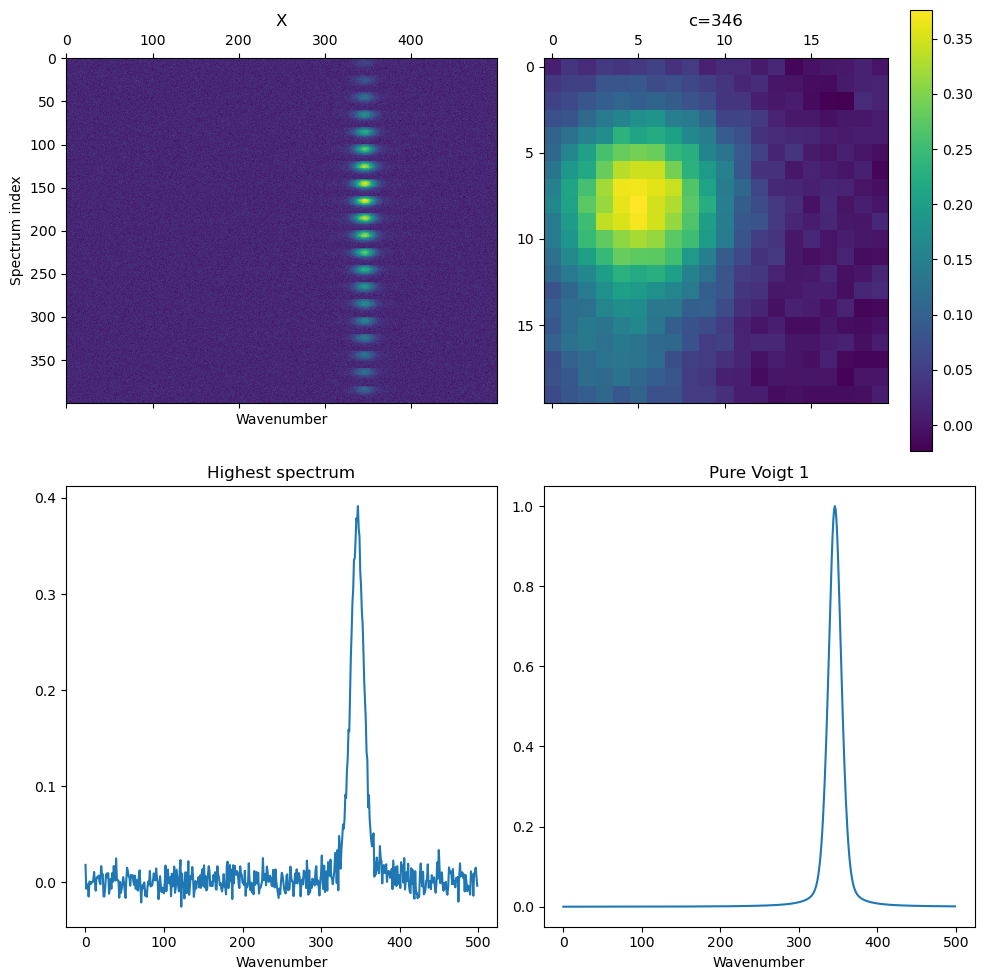

In [130]:
plot_map(gen, X)

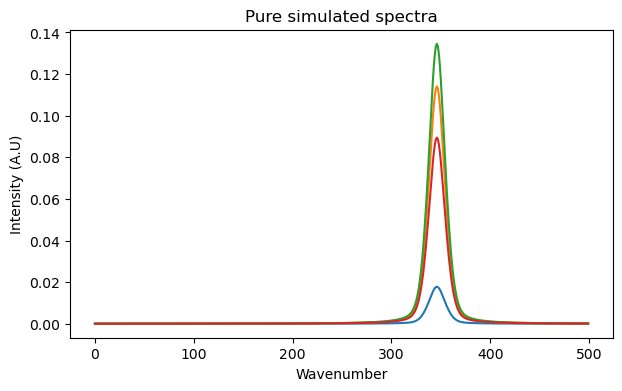

In [89]:
fig = plt.figure(figsize=(7,4))
ax = fig.add_subplot()
ax.plot((gen.alpha @ gen.Vp)[::100,:].T)
ax.set_title('Pure simulated spectra')
ax.set_xlabel('Wavenumber')
ax.set_ylabel('Intensity (A.U)')
plt.show()

In [118]:
mapsize= (5,5)
N = mapsize[0]*mapsize[1]
W = 200

gen = SERSGenerator(mapsize=mapsize, Nw=W, eta=[0.5])
X = gen.generate(N_hotspots=2, K=1, sig=0.2, sbr=1, plot=False, background='none')
X = np.clip(X, a_min=0, a_max=None)

In [119]:
np.mean(np.std(X, axis=0))

0.03464188090201805

In [120]:
def plot_map(gen, X, figsize=(8,8)):
    fig, axs = plt.subplots(2,2, figsize=figsize)

    # SERS Matrix
    axs[0,0].imshow(X, cmap='viridis', interpolation='none')
    axs[0,0].set_xlabel('Wavenumber')
    axs[0,0].set_ylabel('Spectrum index')
    axs[0,0].set_title('X')
    axs[0,0].grid(False)

    # Map at peak 1
    mappable = axs[0,1].imshow(X[:, int(round(gen.c[0]))].reshape(*gen.mapsize), cmap='viridis', interpolation='none')
    axs[0,1].set_title(f'c={round(gen.c[0])}')
    axs[0,1].grid(False)
    plt.colorbar(mappable=mappable, ax=axs[0,1])

    # One spectrum
    axs[1,0].plot(X[np.argmax(X)//gen.Nw,:])
    axs[1,0].set_xlabel('Wavenumber')
    axs[1,0].set_title('Highest spectrum')

    # Pure Voigt of peak 1
    axs[1,1].plot(gen.Vp[0,:])
    axs[1,1].set_xlabel('Wavenumber')
    axs[1,1].set_title('Pure Voigt 1')

    fig.tight_layout()
    plt.show()

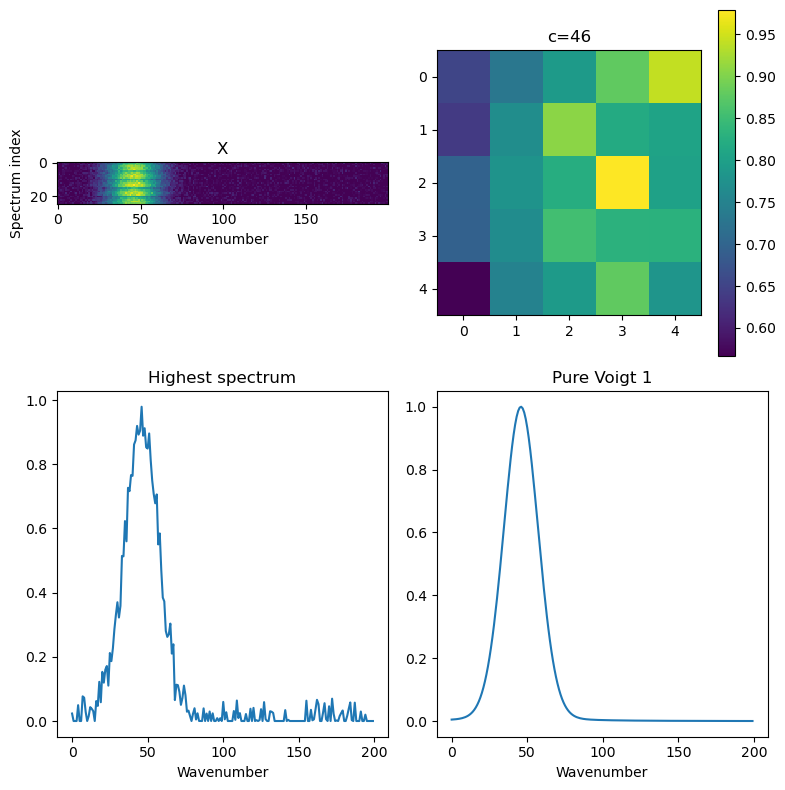

In [121]:
plot_map(gen, X)

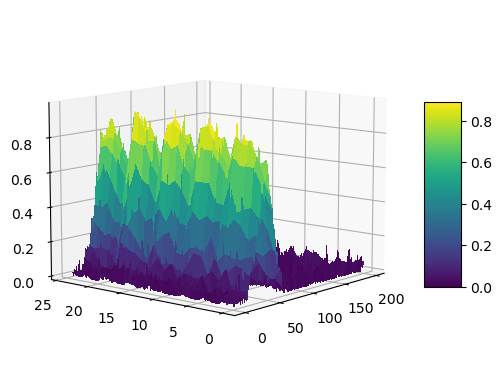

In [122]:
from matplotlib import cm

XX, YY = np.meshgrid(np.arange(W), np.arange(N))
ZZ = X


fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# Plot the surface.
surf = ax.plot_surface(XX, YY, ZZ, cmap=cm.viridis,
                       linewidth=0, antialiased=False)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

ax.view_init(10, 180+40, vertical_axis='z')

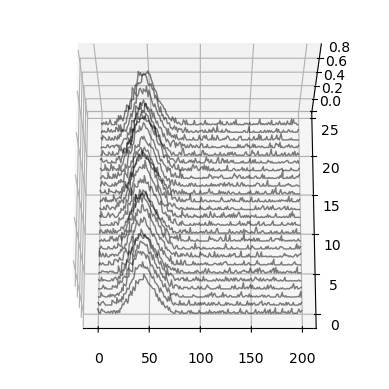

In [123]:
ax = plt.axes(projection='3d')

xline = np.arange(W)
yline = np.arange(N)
for i in range(N):
    zline = X[i,:]
    yline = np.ones((W,)) * i
    ax.plot3D(xline, yline, zline, 'black', lw=1, alpha=0.5)
    

ax.view_init(70, 180+90, vertical_axis='z')

# PCA on 1 map

In [6]:
from sklearn.decomposition import PCA

In [8]:
pca = PCA()
pca.fit(X)

A = pca.components_.T
S = pca.transform(X)

print('X shape:', X.shape)
print('PCs shape:', A.shape)
print('scores shape:', S.shape)

X shape: (400, 500)
PCs shape: (500, 400)
scores shape: (400, 400)


It takes 175 components to explain 95% of the total variance.


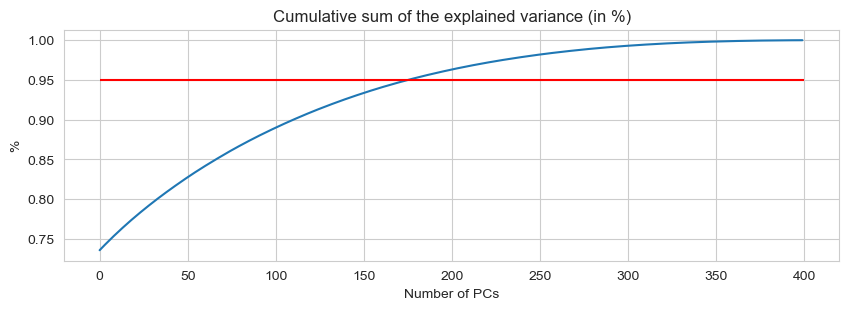

In [18]:
nb = next(x[0] for x in enumerate(np.cumsum(pca.explained_variance_ratio_)) if x[1] > 0.95)
print('It takes {} components to explain 95% of the total variance.'.format(nb))

fig, ax = plt.subplots(figsize=(10,3))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.hlines(0.95, xmin=0, xmax=400, color='r')
ax.set_title('Cumulative sum of the explained variance (in %)')
ax.set(xlabel='Number of PCs', ylabel='%')
plt.grid(True)
plt.show()

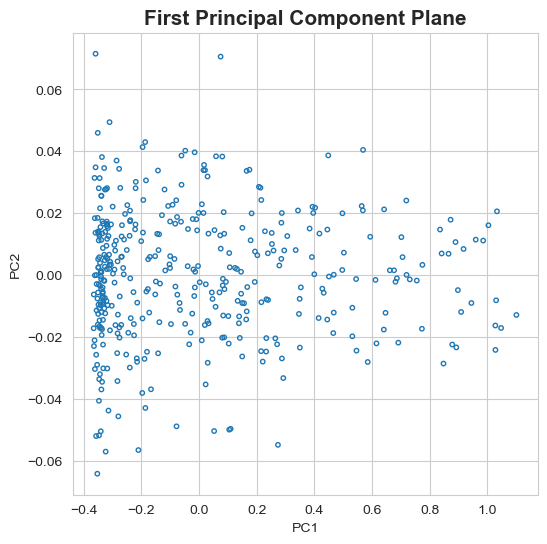

In [20]:
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(S[:,0], S[:,1], s=10, marker='o', edgecolors='C0', facecolors='none')
ax.set_title('First Principal Component Plane', fontsize=15, fontweight='bold')
ax.set(xlabel='PC1', ylabel='PC2')
plt.show()